In [424]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple


## **Tiền xử lý dữ liệu 1999-2022**

In [425]:
raw_data_1999_2022 = pd.read_csv("./DATA/infant_mortality_data_2003_2022.csv")
raw_data_1999_2022.head()

,Cause of death,Age of mother,Mother's education,Birth weight,Age of infant at death,Deaths,Births,Death rate per 1000,Year
0,Certain infectious and parasitic diseases (A00...,15-19 years,9 - 11 years,500 - 999 grams,28 - 364 days,13.0,1607.0,8.12 (Unreliable),2003
1,Certain infectious and parasitic diseases (A00...,15-19 years,12 years,500 - 999 grams,28 - 364 days,12.0,995.0,12.09 (Unreliable),2003
2,Certain infectious and parasitic diseases (A00...,20-24 years,12 years,500 - 999 grams,28 - 364 days,14.0,2456.0,5.74 (Unreliable),2003
3,Certain infectious and parasitic diseases (A00...,20-24 years,12 years,2500 - 2999 grams,28 - 364 days,10.0,82446.0,0.12 (Unreliable),2003
4,Certain infectious and parasitic diseases (A00...,20-24 years,13 - 15 years,500 - 999 grams,28 - 364 days,16.0,1222.0,13.17 (Unreliable),2003


In [426]:
raw_data_1999_2022.shape

(17273, 9)

### **1. Làm sạch dữ liệu**

Xử lý dữ liệu bị trùng lặp

In [427]:
num_duplicated_rows = raw_data_1999_2022.index.duplicated(keep='first').sum()

In [428]:
if num_duplicated_rows == 0: 
    print("Dữ liệu không có trùng lặp")
else : 
    print(f"Dữ liệu có  trùng lặp: {num_duplicated_rows} ")

Dữ liệu không có trùng lặp


**Xử lý mất giá trị**

In [429]:
def missing_ratio(series):
    return series.isnull().mean() * 100

In [430]:
miss_value_ratio = missing_ratio(raw_data_1999_2022)
miss_value_ratio

Cause of death            0.0
Age of mother             0.0
Mother's education        0.0
Birth weight              0.0
Age of infant at death    0.0
Deaths                    0.0
Births                    0.0
Death rate per 1000       0.0
Year                      0.0
dtype: float64

- Không có giá trị mất

In [431]:
dtypes = raw_data_1999_2022.dtypes
dtypes

Cause of death             object
Age of mother              object
Mother's education         object
Birth weight               object
Age of infant at death     object
Deaths                    float64
Births                    float64
Death rate per 1000        object
Year                        int64
dtype: object

**Thay đổi kiểu dữ liệu phù hợp**

In [432]:
raw_data_1999_2022['Year'] = raw_data_1999_2022['Year'].astype('category')

raw_data_1999_2022['Births'] = raw_data_1999_2022['Births'].astype(int)
raw_data_1999_2022['Deaths'] = raw_data_1999_2022['Deaths'].astype(int)

# Loại bỏ phần "(Unreliable)" trong cột "Death rate per 1000"
raw_data_1999_2022["Death rate per 1000"] = raw_data_1999_2022["Death rate per 1000"].str.extract(r"(\d+\.\d+)").astype(float)

In [433]:
raw_data_1999_2022.dtypes

Cause of death              object
Age of mother               object
Mother's education          object
Birth weight                object
Age of infant at death      object
Deaths                       int64
Births                       int64
Death rate per 1000        float64
Year                      category
dtype: object

**Xoá giá trị nhiễu**

In [434]:
Age_of_mother = raw_data_1999_2022['Age of mother'].unique()
Age_of_mother

array(['15-19 years', '20-24 years', '25-29 years', '30-34 years',
       'Under 15 years', '35-39 years', '40-44 years'], dtype=object)

In [435]:
Birth_weight  = raw_data_1999_2022['Birth weight'].unique()
Birth_weight

array(['500 - 999 grams', '2500 - 2999 grams', '3000 - 3499 grams',
       '1000 - 1499 grams', '2000 - 2499 grams', '3500 - 3999 grams',
       '499 grams or less', '1500 - 1999 grams', '4000 - 4499 grams',
       'Unknown or Not Stated'], dtype=object)

- Nhiễu : "Unknown or Not Stated" , thực hiện xoá nhiễu

In [436]:
raw_data_1999_2022 = raw_data_1999_2022[raw_data_1999_2022['Birth weight'] != 'Unknown or Not Stated']
raw_data_1999_2022

,Cause of death,Age of mother,Mother's education,Birth weight,Age of infant at death,Deaths,Births,Death rate per 1000,Year
0,Certain infectious and parasitic diseases (A00...,15-19 years,9 - 11 years,500 - 999 grams,28 - 364 days,13,1607,8.12,2003
1,Certain infectious and parasitic diseases (A00...,15-19 years,12 years,500 - 999 grams,28 - 364 days,12,995,12.09,2003
2,Certain infectious and parasitic diseases (A00...,20-24 years,12 years,500 - 999 grams,28 - 364 days,14,2456,5.74,2003
3,Certain infectious and parasitic diseases (A00...,20-24 years,12 years,2500 - 2999 grams,28 - 364 days,10,82446,0.12,2003
4,Certain infectious and parasitic diseases (A00...,20-24 years,13 - 15 years,500 - 999 grams,28 - 364 days,16,1222,13.17,2003
...,...,...,...,...,...,...,...,...,...
17268,"#Assault (homicide) (*U01,X85-Y09)",20-24 years,High school graduate or GED completed,3000 - 3499 grams,28 - 364 days,17,123072,0.14,2022
17269,"#Assault (homicide) (*U01,X85-Y09)",20-24 years,High school graduate or GED completed,3500 - 3999 grams,28 - 364 days,10,67511,0.15,2022
17270,"#Assault (homicide) (*U01,X85-Y09)",25-29 years,High school graduate or GED completed,2500 - 2999 grams,28 - 364 days,10,60404,0.17,2022
17271,"#Assault (homicide) (*U01,X85-Y09)",25-29 years,"Some college credit, but not a degree",3000 - 3499 grams,28 - 364 days,11,84241,0.13,2022


In [437]:
Mother_education  = raw_data_1999_2022['Mother\'s education'].unique()
Mother_education

array(['9 - 11 years', '12 years', '13 - 15 years', '16 years and over',
       '0 -  8 years', 'Not stated/Not on certificate',
       'High school graduate or GED completed',
       '9th through 12th grade with no diploma',
       'Some college credit, but not a degree', '8th grade or less',
       'Associate degree (AA, AS)', "Bachelor's degree (BA, AB, BS)",
       "Master's degree (MA, MS, MEng, MEd, MSW, MBA)",
       'Doctorate (PhD, EdD) or Professional Degree (MD, DDS, DVM, LLB, JD)'],
      dtype=object)

In [438]:
Mother_education  = raw_data_1999_2022['Age of infant at death'].unique()
Mother_education

array(['28 - 364 days', '1 - 23 hours', 'Under 1 hour', '1 - 6 days',
       '7 - 27 days'], dtype=object)

**Chuấn hoá lại giá trị các cột**

In [439]:
# Loại bỏ các đơn vị như "years", "grams", "days"
raw_data_1999_2022["Age of mother"] = raw_data_1999_2022["Age of mother"].str.replace(" years", "", regex=False)
raw_data_1999_2022["Birth weight"] = raw_data_1999_2022["Birth weight"].str.replace(" grams", "", regex=False)
raw_data_1999_2022["Age of infant at death"] = raw_data_1999_2022["Age of infant at death"].str.replace(" days", "", regex=False)

In [440]:
def checking_data(df: pd.DataFrame) -> bool:
    # Kiểm tra các điều kiện cho từng cột
    check_deaths = (df['Deaths'] >= 0).all()
    check_births = (df['Births'] >= 0).all()
    check_death_rate = (df['Death rate per 1000'] >= 0).all() and (df['Death rate per 1000'] <= 1000).all()
    
    # Kết hợp các điều kiện
    check = check_deaths and check_births and check_death_rate
    
    return check

In [441]:
checking_data(raw_data_1999_2022) == True

True

**Đưa về cùng 1 mức xếp trình độ học vấn của người mẹ**

In [442]:
for index, row in raw_data_1999_2022.iterrows():
    
    education = row["Mother's education"]
    
    # kiểm tra giá trị và đưa về cùng dạng
    if education == "0 - 8 years" or education == "8th grade or less":
        raw_data_1999_2022.loc[index, "Mother's education"] = "Elementary School or Less"
        
    if education == "9 - 11 years" or education == "9th through 12th grade with no diploma":
        raw_data_1999_2022.loc[index, "Mother's education"] = "High School Incomplete"
        
    if education == "12 years" or education == "High school graduate or GED completed":
        raw_data_1999_2022.loc[index, "Mother's education"] = "High School Graduate"
        
    if education == "13 - 15 years" or education == "Some college credit, but not a degree" or education == "Associate's degree" :
        raw_data_1999_2022.loc[index, "Mother's education"] = "Some College Education"
    
    if education == "16 years and over" or education == "Bachelor's degree (BA, AB, BS)" or education == " Master's degree (MA, MS) "or education == "Doctorate (PHD, EdD) or Professional Degree (MD, DDS, DVM, LLB, JD)":
        raw_data_1999_2022.loc[index, "Mother's education"] = "College Graduate or Higher"
    if education == "Not stated/Not on certificate":
        raw_data_1999_2022.loc[index, "Mother's education"] = "Not Stated"
        

In [443]:
raw_data_1999_2022.describe()

,Deaths,Births,Death rate per 1000
count,17267.000000,17267.000000,17267.000000
mean,25.680489,14147.556263,74.759928
std,24.081265,27916.352550,108.207997
min,10.000000,19.000000,0.070000
25%,12.000000,253.000000,1.320000
50%,17.000000,823.000000,24.410000
75%,29.000000,12737.000000,105.320000
max,321.000000,169159.000000,790.770000


**Xoá outliers**

In [444]:
numerical_cols = ['Deaths', 'Births', 'Death rate per 1000']

**Trực quan bằng boxplot để xác định outliers**

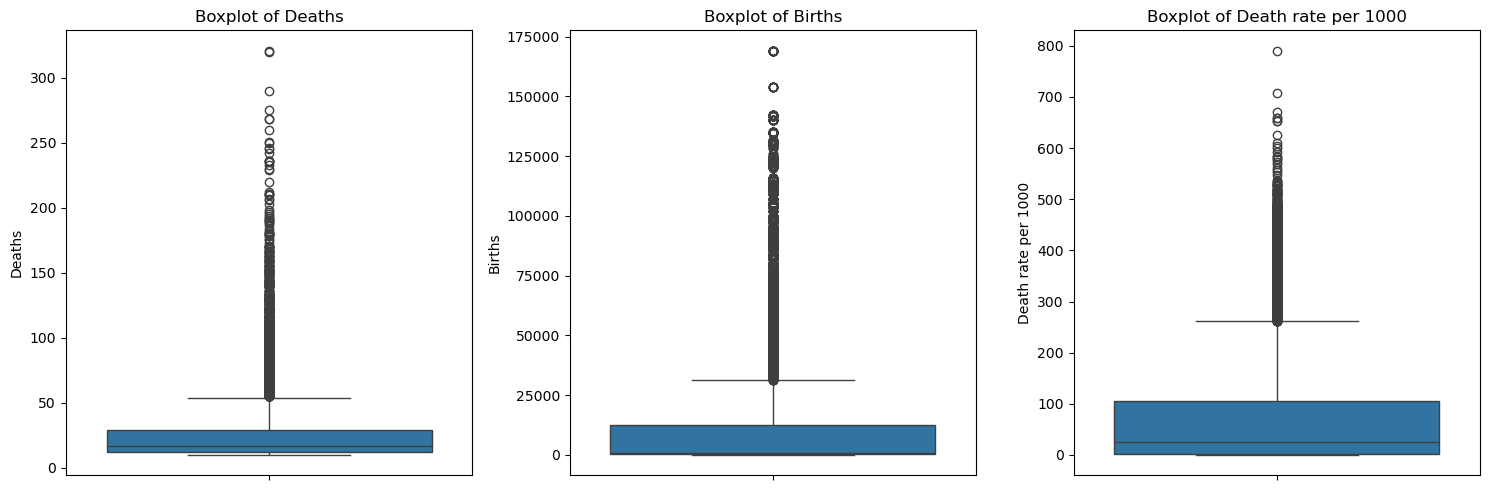

In [452]:
def detect_outlier(df: pd.DataFrame, numerical_cols: list):
    # Create a figure with a dynamic number of subplots
    plt.figure(figsize=(5 * len(numerical_cols), 5))  # Adjust width based on number of columns
    for i, col in enumerate(numerical_cols):
        plt.subplot(1, len(numerical_cols), i + 1)  # Dynamically set the number of columns
        sns.boxplot(y=df[col])  # Use the dataframe passed as argument
        plt.title(f'Boxplot of {col}')
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()
        
detect_outlier(raw_data_1999_2022,numerical_cols)

In [447]:
def find_boxplot_boundaries(col: pd.Series, whisker_coeff: float = 1.5) -> Tuple[float, float]:
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - whisker_coeff * IQR
    upper = Q3 + whisker_coeff * IQR
    return lower, upper

def clip_outliers(col: pd.Series, whisker_coeff: float = 1.5) -> pd.Series:
    lower, upper = find_boxplot_boundaries(col, whisker_coeff)
    return col.clip(lower, upper)

def remove_outliers_from_dataframe(df: pd.DataFrame, numerical_cols: list, whisker_coeff: float = 1.5) -> pd.DataFrame:
    df_clipped = df.copy()
    for col in numerical_cols:
        if col in df.columns:
            df_clipped[col] = clip_outliers(df_clipped[col], whisker_coeff)
    return df_clipped

clipped_data = remove_outliers_from_dataframe(raw_data_1999_2022, numerical_cols)

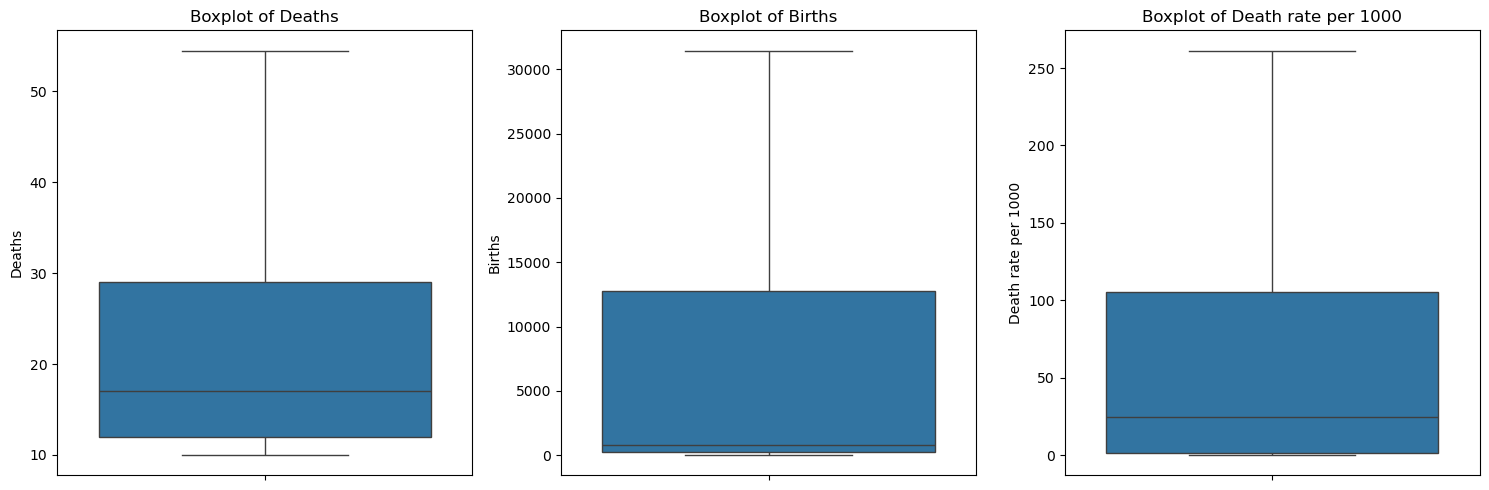

In [448]:
detect_outlier(clipped_data,numerical_cols)

In [449]:
# # Define Z-score threshold
# z_threshold = 1.3

# # Calculate mean and standard deviation
# mean = raw_data_1999_2022['Death rate per 1000'].mean()
# std = raw_data_1999_2022['Death rate per 1000'].std()

# # Calculate lower and upper bounds for clipping
# lower_bound = mean - z_threshold * std
# upper_bound = mean + z_threshold * std

# # Clip the outliers
# raw_data_1999_2022['Death rate per 1000'] = raw_data_1999_2022['Death rate per 1000'].clip(lower_bound, upper_bound)

# raw_data_1999_2022['Clipped Death rate per 1000'] = raw_data_1999_2022['Death rate per 1000']

# plt.figure(figsize=(15, 10))
# plt.subplot(2, 1, 1)
# sns.boxplot(data=raw_data_1999_2022, x='Year', y='Death rate per 1000')
# plt.title('Original Death rate per 1000 by Year')

# plt.subplot(2, 1, 2)
# sns.boxplot(data=raw_data_1999_2022, x='Year', y='Clipped Death rate per 1000')
# plt.title('Clipped Death rate per 1000 by Year')

# plt.tight_layout()
# plt.show()

**Xuất file đã tiền xử lý**

In [450]:
clipped_data.to_csv("./DATA/preprocessing_2019_2022.csv", index=False)


In [451]:
one_hot_encode_df = pd.get_dummies(clipped_data, drop_first=True)
one_hot_encode_df

,Deaths,Births,Death rate per 1000,"Cause of death_#Assault (homicide) (*U01,X85-Y09)",Cause of death_#Atelectasis (P28.0-P28.1),Cause of death_#Bacterial sepsis of newborn (P36),Cause of death_#Chronic respiratory disease originating in the perinatal period (P27),"Cause of death_#Congenital malformations, deformations and chromosomal abnormalities (Q00-Q99)",Cause of death_#Diarrhea and gastroenteritis of infectious origin (A09),Cause of death_#Diseases of the circulatory system (I00-I99),...,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020,Year_2021,Year_2022
0,13.0,1607,8.12,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,12.0,995,12.09,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,14.0,2456,5.74,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,10.0,31463,0.12,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,16.0,1222,13.17,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17268,17.0,31463,0.14,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
17269,10.0,31463,0.15,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
17270,10.0,31463,0.17,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
17271,11.0,31463,0.13,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


## **Khám phá dữ liệu**